In [14]:
import yfinance as yf
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
nb = yf.Ticker("^NSEBANK")
#nb = yf.Ticker("^GSPC")

In [16]:
nb = nb.history(period="max")
nb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0,0.0,0.0
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0,0.0,0.0
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0,0.0,0.0
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0,0.0,0.0
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-20 00:00:00+05:30,48834.148438,49650.601562,48683.601562,49350.800781,173100,0.0,0.0
2025-01-21 00:00:00+05:30,49532.000000,49543.148438,48430.949219,48570.898438,134700,0.0,0.0
2025-01-22 00:00:00+05:30,48689.550781,48781.750000,48074.050781,48724.398438,151700,0.0,0.0


In [16]:
#nb['Date'] = nb.index.date

In [17]:
# Convert the column to datetime (adjust based on your actual column name)
#nb['Dates'] = pd.to_datetime(nb['Date'])

# Remove the time component
#nb['Date_only'] = nb['Dates'].dt.date


Data Preprocessing

In [18]:
nb.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [19]:
nb.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2025-01-06 00:00:00+05:30', '2025-01-07 00:00:00+05:30',
               '2025-01-08 00:00:00+05:30', '2025-01-09 00:00:00+05:30',
               '2025-01-10 00:00:00+05:30', '2025-01-13 00:00:00+05:30',
               '2025-01-14 00:00:00+05:30', '2025-01-15 00:00:00+05:30',
               '2025-01-16 00:00:00+05:30', '2025-01-17 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=3977, freq=None)

<Axes: xlabel='Date'>

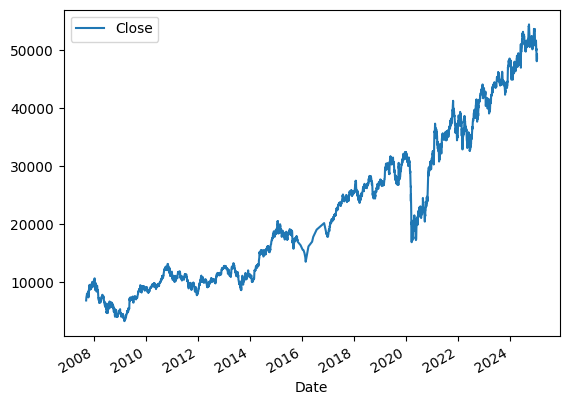

In [20]:
nb.plot.line(y="Close" , use_index = True)

In [21]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3977 entries, 2007-09-17 00:00:00+05:30 to 2025-01-17 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3977 non-null   float64
 1   High          3977 non-null   float64
 2   Low           3977 non-null   float64
 3   Close         3977 non-null   float64
 4   Volume        3977 non-null   int64  
 5   Dividends     3977 non-null   float64
 6   Stock Splits  3977 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 248.6 KB


In [22]:
del nb["Dividends"]
del nb["Stock Splits"]

In [23]:
nb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0


In [24]:
nb.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-13 00:00:00+05:30,48264.250000,48606.351562,47898.351562,48041.250000,168800
2025-01-14 00:00:00+05:30,48266.898438,49007.351562,48235.199219,48729.148438,151900
2025-01-15 00:00:00+05:30,48832.750000,49083.648438,48522.398438,48751.699219,145100
2025-01-16 00:00:00+05:30,49082.898438,49459.000000,49038.449219,49278.699219,146700
2025-01-17 00:00:00+05:30,48959.500000,49047.199219,48309.500000,48540.601562,130600


In [25]:
nb["Tomorrow"] = nb["Close"].shift(-1)
nb

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0,7059.567871
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0,7401.764160
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0,7390.063965
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0,7464.413086
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0,7650.811035
...,...,...,...,...,...,...
2025-01-13 00:00:00+05:30,48264.250000,48606.351562,47898.351562,48041.250000,168800,48729.148438
2025-01-14 00:00:00+05:30,48266.898438,49007.351562,48235.199219,48729.148438,151900,48751.699219
2025-01-15 00:00:00+05:30,48832.750000,49083.648438,48522.398438,48751.699219,145100,49278.699219


In [26]:
nb["Target"] = (nb["Tomorrow"] > nb["Close"]).astype(int)
nb

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0,7059.567871,1
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0,7401.764160,1
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0,7390.063965,0
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0,7464.413086,1
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0,7650.811035,1
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+05:30,48264.250000,48606.351562,47898.351562,48041.250000,168800,48729.148438,1
2025-01-14 00:00:00+05:30,48266.898438,49007.351562,48235.199219,48729.148438,151900,48751.699219,1
2025-01-15 00:00:00+05:30,48832.750000,49083.648438,48522.398438,48751.699219,145100,49278.699219,1


In [27]:
nb = nb.loc["1990-01-01":].copy()
nb

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0,7059.567871,1
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0,7401.764160,1
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0,7390.063965,0
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0,7464.413086,1
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0,7650.811035,1
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+05:30,48264.250000,48606.351562,47898.351562,48041.250000,168800,48729.148438,1
2025-01-14 00:00:00+05:30,48266.898438,49007.351562,48235.199219,48729.148438,151900,48751.699219,1
2025-01-15 00:00:00+05:30,48832.750000,49083.648438,48522.398438,48751.699219,145100,49278.699219,1


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators =100, min_samples_split = 1000, random_state = 100)
train = nb.iloc[: -100]
test  = nb.iloc[-100: ]
predictors = ["Close" , "Open" , "Volume" , "High" , "Low"]
model.fit(train[predictors] , train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=100)

In [29]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [30]:
preds = pd.Series(preds , index = test.index)

In [31]:
preds

Date
2024-08-26 00:00:00+05:30    1
2024-08-27 00:00:00+05:30    1
2024-08-28 00:00:00+05:30    1
2024-08-29 00:00:00+05:30    1
2024-08-30 00:00:00+05:30    1
                            ..
2025-01-13 00:00:00+05:30    0
2025-01-14 00:00:00+05:30    1
2025-01-15 00:00:00+05:30    1
2025-01-16 00:00:00+05:30    0
2025-01-17 00:00:00+05:30    0
Length: 100, dtype: int64

In [32]:
precision_score(test["Target"] , preds)

0.5416666666666666

In [33]:
combined = pd.concat([test["Target"] , preds] , axis = 1)

<Axes: xlabel='Date'>

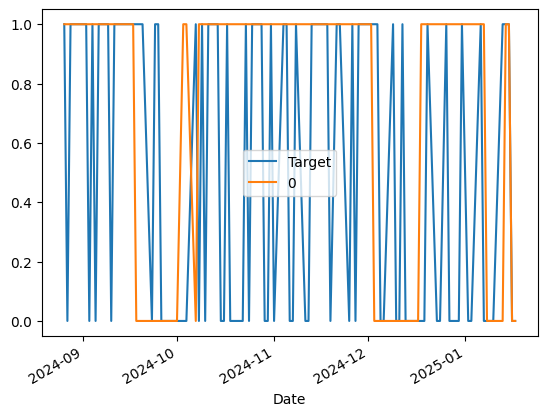

In [45]:
combined.plot()

In [46]:
def train_model():
    model = LogisticRegression()  # This is indented correctly
    lr.fit(X_train, y_train)  # Corrected indentation

In [47]:
lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)
    predictions['Logistic Regression'] = y_pred_lr

IndentationError: unexpected indent (834874763.py, line 2)

In [48]:
def predict(train , test , predictors , model):
    model.fit(train[predictors] , train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds , index = test.index , name="Predictions")
    combined = pd.concat([test["Target"] , preds] , axis = 1)
    return combined

In [49]:
def backtest(data , model , predictors , start = 2500 , step=250):
    all_predictions = []

    for i in range(start , data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i : (i+step)].copy()
        predictions = predict(train , test , predictors ,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)    

In [50]:
predictions = backtest(nb , model , predictors)

In [51]:
predictions["Predictions"].value_counts()

Predictions
0    1179
1     298
Name: count, dtype: int64

In [52]:
precision_score(predictions["Target"] , predictions["Predictions"])

0.5671140939597316

In [53]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.529452
0    0.470548
Name: count, dtype: float64

In [54]:
horizons = [2 , 5, 60 ,250 ,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nb.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    nb[ratio_column] = nb["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nb[trend_column] = nb.shift(1).rolling(horizon).sum()["Target"]

    new_predictors +=[ratio_column , trend_column]
    

In [55]:
nb  = nb.dropna()

In [56]:
nb.head(3)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2011-10-12 00:00:00+05:30,9240.292854,9514.089473,9193.643006,9482.189453,0,9591.138672,1,1.016272,2.0,1.040424,4.0,0.953254,27.0,0.862862,120.0,1.114108,517.0
2011-10-13 00:00:00+05:30,9593.888640,9684.937388,9546.988794,9591.138672,0,9660.288086,1,1.005712,2.0,1.032220,5.0,0.966869,28.0,0.873705,120.0,1.126574,517.0
2011-10-14 00:00:00+05:30,9548.138999,9691.736939,9526.839442,9660.288086,0,9721.186523,1,1.003592,2.0,1.025923,5.0,0.976412,29.0,0.880904,121.0,1.134395,517.0


In [57]:
model = RandomForestClassifier(n_estimators = 200 , min_samples_split = 50 , random_state = 1)

In [58]:
def predict(train , test , predictors , model):
    model.fit(train[predictors] , train["Target"])
    preds = model.predict_proba(test[predictors])[: , 1]
    preds[preds >= .6]=1
    preds[preds < .6] = 0
    preds = pd.Series(preds , index = test.index , name="Predictions")
    combined = pd.concat([test["Target"] , preds] , axis = 1)
    return combined

In [ ]:
predictions = backtest(nb , model , new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [37]:
precision_score(predictions["Target"] , predictions["Predictions"])

0.5757931844888367

<Axes: xlabel='Date'>

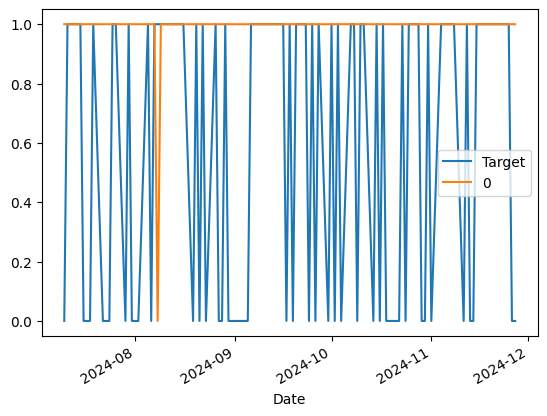

In [38]:
combined.plot()

In [40]:
# Fetch data for Bajaj Finance
ticker = 'BAJFINANCE.NS'
data = yf.download(ticker, start='2023-05-01', end='2023-06-01')
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
data.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [41]:
# Prepare the data
data['Day'] = data['Date'].dt.day
features = ['Open', 'High', 'Low', 'Volume', 'Day']
X = data[features]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 114.41469335937491
Mean Squared Error: 21810.947463715336
R2 Score: 0.6986709777141418


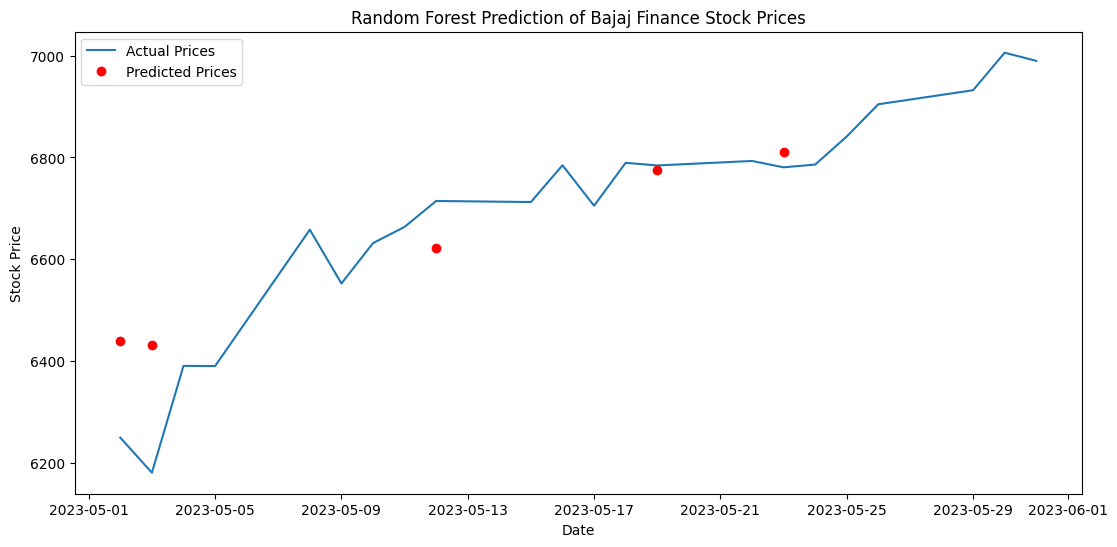

In [44]:
# Plot the predictions
plt.figure(figsize=(13, 6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'][X_test.index], y_pred, 'ro', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Random Forest Prediction of Bajaj Finance Stock Prices')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21984\1851527963.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['5_day_MA'] = data['Close'].rolling(window=5).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21984\1851527963.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['10_day_MA'] = data['Close'].rolling(window=10).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21984\1851527963.py:22: SettingWithCopyWarning: 
A

Linear Regression:
 MSE: 254861.2482, R2: 0.9954

Random Forest:
 MSE: 433094.8711, R2: 0.9921

SVR:
 MSE: 62754592.3025, R2: -0.1424



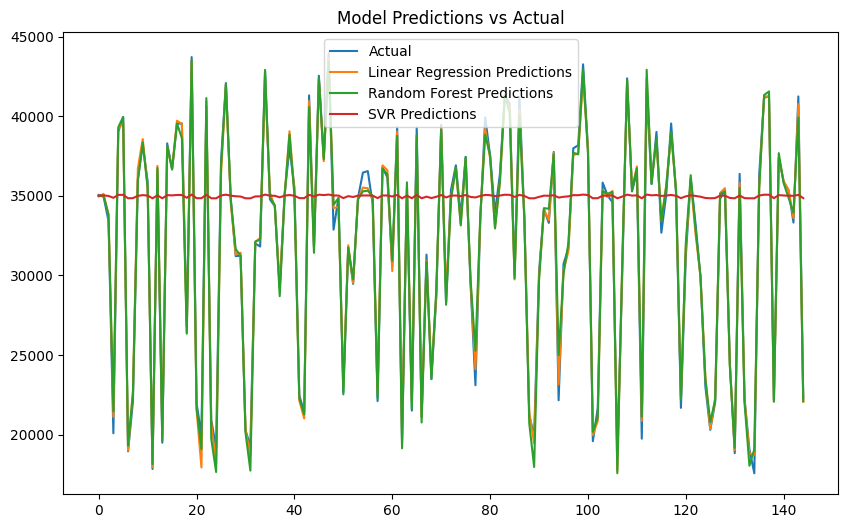

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch Bank Nifty data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Close'].pct_change()
    data = data.dropna()
    return data

# Feature Engineering
def prepare_features(data):
    data['5_day_MA'] = data['Close'].rolling(window=5).mean()
    data['10_day_MA'] = data['Close'].rolling(window=10).mean()
    data['20_day_MA'] = data['Close'].rolling(window=20).mean()
    data['Volatility'] = data['Close'].rolling(window=5).std()
    data = data.dropna()
    X = data[['5_day_MA', '10_day_MA', '20_day_MA', 'Volatility']]
    y = data['Close']
    return X, y

# Train and evaluate models
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Linear Regression'] = (mean_squared_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr))
    
    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results['Random Forest'] = (mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf))
    
    # SVR
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    results['SVR'] = (mean_squared_error(y_test, y_pred_svr), r2_score(y_test, y_pred_svr))
    
    return results, y_test, y_pred_lr, y_pred_rf, y_pred_svr

# Main function
def main():
    ticker = '^NSEBANK'  # Bank Nifty symbol
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    
    data = fetch_data(ticker, start_date, end_date)
    X, y = prepare_features(data)
    results, y_test, y_pred_lr, y_pred_rf, y_pred_svr = evaluate_models(X, y)
    
    # Display results
    for model, metrics in results.items():
        print(f"{model}:\n MSE: {metrics[0]:.4f}, R2: {metrics[1]:.4f}\n")
    
    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Actual")
    plt.plot(y_pred_lr, label="Linear Regression Predictions")
    plt.plot(y_pred_rf, label="Random Forest Predictions")
    plt.plot(y_pred_svr, label="SVR Predictions")
    plt.legend()
    plt.title("Model Predictions vs Actual")
    plt.show()

if __name__ == "__main__":
    main()
